# INFO 371 - Problem Set 1

Due: October 13 2024, 11:59 PM

### Instructions

Before beginning this assignment, please ensure you have access to a working instance of Jupyter Notebooks with Python 3.

1. First, replace the "YOUR NAME HERE" text in the next cell with your own full name. Any collaborators must also be listed in this cell.

2. Be sure to include well-documented (e.g. commented) code cells, figures, and clearly written text  explanations as necessary. Any figures should be clearly labeled and appropriately referenced within the text. Be sure that each visualization adds value to your written explanation; avoid redundancy – you do no need four different visualizations of the same pattern.

3. Collaboration on problem sets and labs is fun, useful, and encouraged. However, each student must turn in an individual write-up in their own words as well as code/work that is their own. Regardless of whether you work with others, what you turn in must be your own work; this includes code and interpretation of results. The names of all collaborators must be listed on each assignment. Do not copy-and-paste from other students’ responses or code - your code should never be on any other student's screen or machine.

4. All materials and resources that you use (with the exception of lecture slides) must be appropriately referenced within your assignment.

5. Partial credit will be awarded for each question for which a serious attempt at finding an answer has been shown. Students are *strongly* encouraged to attempt each question and document their reasoning process even if they cannot find the correct answer. 

6. After completing the assignment, ensure that your code can run from start to finish without issue. Restart the kernal and run all cells to double check.

Name: Trevor Tang

Collaborators: Salley Fang, Jasmine Wong

### Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on Canvas). For context, in the 1990s, the Mexican government tried to improve school attendance of poor rural children by introducing a cash subsidy to families. However, the families were only able to claim the money if a) they were considered poor and b) if their children attended school. Most importantly in the context of this problem set, the subsidy was introduced in a randomized manner where initially only certain villages were eligible for subsidies. The goal of this problem set is to implement some of the basic econometric techniques you have learned in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999"
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa.csv data from Canvas. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|

Please note that 1) the Progresa program was only available for poor families, so we only consider poor households in this analysis and 2) the central variable here is _sc_, the dummy variable indicating whether the child attended school.

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Descriptive analysis

### 1.1	Examine the Data

Download and load the data into python. How many rows (observations) do we have? How many different villages? How many distinct villages?

In [2]:
data = pd.read_csv("./progresa.csv")
data.head()

,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
0,97,0.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,1,7,1.0
1,98,0.0,0.0,4.473,1.0,8.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,14,163,1,7,1.0
2,97,1.0,0.0,4.473,1.0,6.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,12,163,2,6,1.0
3,98,1.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,2,6,1.0
4,97,0.0,0.0,4.473,1.0,2.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,8,163,3,2,1.0


In [3]:
data.shape

(77250, 21)

There are 77,250 rows.

In [4]:
data.nunique()[["village", "folnum"]]

village      505
folnum     38625
dtype: int64

There are 505 different villages in the dataset and 38,625 unique folnums (id's) in the dataset.

### 1.2	Summary Statistics

Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, and village). Present these in a single table alphabetized by variable name. Your output should look something like the following table. What do you see?

| Variable name | Mean | Std Dev |
|------|------|------|
|V1|?|?|
|V2|?|?|

In [5]:
# First, drop the columns of "year", "folnum", and "village", convert the poor and progresa to numerical variables, 
# and then use the desribe() function to get statistics
# filter by mean and std, take the tranpose of the table (for formatting), and sort the indexes

demographic_data = data.drop(labels=["year", "folnum", "village"], axis=1)

demographic_data["poor_ind"] = np.where(demographic_data["poor"] == "no pobre", 0, 1)
demographic_data["progresa_ind"] = np.where(demographic_data["progresa"] == '0', 0, 1)

demographic_data.describe().loc[["mean", "std"]].T.sort_index() 

,mean,std
age,11.366460,3.167744
dist_cap,147.674452,76.063134
dist_sec,2.418910,2.234109
fam_n,7.215715,2.352900
grc,3.963537,2.499063
grc97,3.705372,2.572387
hohage,44.436717,11.620372
hohedu,2.768104,2.656106
hohsex,0.925185,0.263095
hohwag,586.985312,788.133664


- I noticed that the average age of children in this data set is around 11 years, and the average family size is about 7 people. This means that households are generally large, so it might be expensive to put children in school as family expenses might be prioritized
- Households on average live around 103 miles from the nearest school, and about 148 miles from the nearest capital. It suggests that education may be a challenge because of travel distance, and that families in the dataset probably live in rural areas. 
- Around 82% of the dataset is enrolled in some education program, but the head of household as on average 2-3 years of education. This indicates that while education is prevalent among the people in the dataset, there isn't a lot of it indicating that continued education may be expensive.
- About 85% of the households in the dataset classify as poor while about 62% of them participate in the progresa program.

### 1.3 Graphical exploration

Create a histogram of village enrollment rates among poor households, before and after treatment, for the treatment and control groups. Specifically, for each village, calculate the average rate of enrollment of **poor** households in progresa (treated) and non-progresa villages in 1997, then compute then compute the same for **poor** villages in 1998. Create a plot with two histograms overlayed (with some transparency) - one histogram for progresa villages and one histogram for non-progresa villages showing the distribution of these average enrollments rates for 1997. On each histogram, draw a vertical line that intersects the x-axis at the average value for that group (progresa or non-progresa). Then do the same for enrollment rates for 1998. What do you notice?

In [6]:
# Filter data for progresa villages
progresa_villages_1997 = data[(data.progresa == "basal") & (data.poor == "pobre") & (data.year == 97)]
progresa_villages_1998 = data[(data.progresa == "basal") & (data.poor == "pobre") & (data.year == 98)]

# Filter data for non-progressa villagaes
non_progresa_villages_1997 = data[(data.progresa == "0") & (data.poor == "pobre") & (data.year == 97)]
non_progresa_villages_1998 = data[(data.progresa == "0") & (data.poor == "pobre") & (data.year == 98)]

# Get the average enrollment for progresa villages
progresa_villages_1997_mean = progresa_villages_1997.groupby("village")["sc"].mean()
progresa_villages_1998_mean = progresa_villages_1998.groupby("village")["sc"].mean()

# Get the average enrollment for non-progresa villages
non_progresa_villages_1997_mean = non_progresa_villages_1997.groupby("village")["sc"].mean()
non_progresa_villages_1998_mean = non_progresa_villages_1998.groupby("village")["sc"].mean()

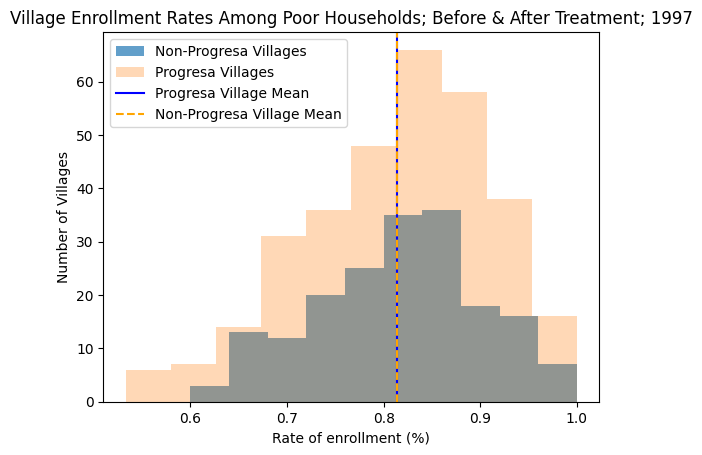

In [7]:
plt.hist(non_progresa_villages_1997_mean, alpha=0.7, label="Non-Progresa Villages")
plt.hist(progresa_villages_1997_mean, alpha=0.3, label="Progresa Villages")
plt.axvline(progresa_villages_1997_mean.mean(), color="blue", linestyle='solid', label="Progresa Village Mean")
plt.axvline(non_progresa_villages_1997_mean.mean(), color="orange", linestyle='dashed', label="Non-Progresa Village Mean")
plt.xlabel("Rate of enrollment (%)")
plt.ylabel("Number of Villages")
plt.legend()
plt.title("Village Enrollment Rates Among Poor Households; Before & After Treatment; 1997")
plt.show()

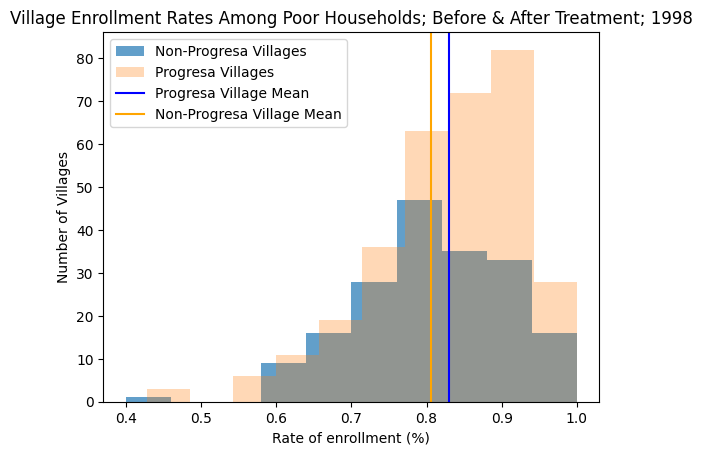

In [8]:
plt.hist(non_progresa_villages_1998_mean, alpha=0.7, label="Non-Progresa Villages")
plt.hist(progresa_villages_1998_mean, alpha=0.3, label="Progresa Villages")
plt.axvline(progresa_villages_1998_mean.mean(), color="blue", label="Progresa Village Mean")
plt.axvline(non_progresa_villages_1998_mean.mean(), color="orange", label="Non-Progresa Village Mean")
plt.xlabel("Rate of enrollment (%)")
plt.ylabel("Number of Villages")
plt.legend()
plt.title("Village Enrollment Rates Among Poor Households; Before & After Treatment; 1998")
plt.show()

I noticed that in 1997 the means are the same for both before and after treatments. This makes sense because the program did not have its first wave until 1998. However, in 1998, we can see that progresa villages had a slightly higher average rate of enrollment than non-progresa villages.

## Part 2: Cross-Sectional Estimates

Next, let's measure the impact of Progresa using three different estimators: the cross-sectional
estimator, the before-after estimator, and the diff-in-diff estimator. We'll implement each estimator in three ways: 
- a) using a tabular approach
- b) simple regression where we only introduce the control/treatment group indicator (or time, in the case of the before-after estimator)
- c) multiple regression

### 2.1 Simple differences: T-test

Start by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the progresa (treatment) villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [9]:
from scipy.stats import ttest_ind

In [10]:
progresa_villages_after_1998 = data[(data.progresa == "basal") & (data.poor == "pobre") & (data.year >= 98)]
non_progresa_villages_after_1998 = data[(data.progresa == "0") & (data.poor == "pobre") & (data.year >= 98)]

average_enrollment_progresa_villages = progresa_villages_after_1998["sc"].mean()
average_enrollment_non_progresa_villages = non_progresa_villages_after_1998["sc"].mean()

print("The average enrollment in progresa villages in 1998:", average_enrollment_progresa_villages)
print("The average enrollment in non-progresa villages in 1998:", average_enrollment_non_progresa_villages)
print("The difference between each mean:", average_enrollment_progresa_villages - average_enrollment_non_progresa_villages)

The average enrollment in progresa villages in 1998: 0.8464791213954308
The average enrollment in non-progresa villages in 1998: 0.807636956730308
The difference between each mean: 0.0388421646651228


In [11]:
progresa_villages_after_1998 = progresa_villages_after_1998.dropna(subset=["sc"])
non_progresa_villages_after_1998 = non_progresa_villages_after_1998.dropna(subset=["sc"])

t_stat, p_val = ttest_ind(progresa_villages_after_1998["sc"], non_progresa_villages_after_1998["sc"])
print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: 8.358720567418374
P-value: 6.636344447523235e-17


From our t-test, we can see that we have a T-statistic of about 8.18 with a p-value < 0.05 which means that it is highly likely that the average enrollment of both treated and control groups are not the same. We can also see from the difference that there was about a 3.88 percent increase in enrollment with the treated group.

### 2.2 Understanding Assumption(s)

In problem 2.1, we only looked at the data from 1998. Why is that the case and what is our counterfactual? What assumption are we making about the counterfactual by doing so?

We only want to compare the change in enrollment rates across groups, those being our control and treatment groups. We choose 1998 since that is when the progresa program implemented the treatment. Our counterfactual is how the enrollment rates would have changed given that we did not apply the treatment. In this case, we assume that the treatment would have no effect on the enrollment rates between the treatment and control groups.

### 2.3 Cross-Sectional (Simple Regression)

Estimate the effects of Progresa on enrollment using a cross-sectional estimator by regressing the 1998 enrollment rates **of the poor** on treatment assignment. Discuss the following:

* A) How much did Progresa increase the likelihood of a child enrolling?
* B) How does your regression estimate compare to your t-test estimate from part 2.1?
* C) Can we reject that the treatment effects are zero? 
* D) What is the counterfactual assumption underlying this regression?

In [12]:
import statsmodels.api as sm

In [13]:
poor_1998 = data[(data.year == 98) & (data.poor == "pobre")].copy()
poor_1998["treatment"] = np.where(poor_1998["progresa"] == "basal", 1, 0)

model = sm.OLS.from_formula("sc ~ treatment", data=poor_1998).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           6.64e-17
Time:                        21:08:24   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8076      0.004    220.676      0.000       0.800       0.815
treatment      0.0388      0.005      8.359      0.000       0.030       0.048
==============================================================================
Omnibus:                     7638.939   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15767.534
Skew:                          -1.767   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                         3.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A) According to our model, progresa (the treatment) would have increased the likelihood of a child enrolling by 3.88 percent. 

B) The regression estimates are practically the same. For the T-test we have 8.359 while for the regression model we also have 8.359

C) Yes, our p-value is less than 0.05, therefore, we can reject the null hypothesis that our treatment has no effect on education enrollment rates and accept the alternative hypothesis that the treatment will have some effect on the enrollment rate.

D) The counterfactual is what would have happened should we have not applied to treatment to our groups. As such, we assume that the enrollment rates would not have changed, so we assume that the enrollment rate would have been B0, or 0.8076

### 2.4 Cross-Sectional (Multiple Regression)

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, gender, education of household head, and whatever else you deem relevant.

* A) How do the controls affect the point estimate of treatment effect?
* B) How do the controls affect the standard error on the treatment effect? 
* C) How do you interpret the differences (or similarities) between your estimates of 2.3 and 2.4?

In [14]:
model = sm.OLS.from_formula("sc ~ treatment + fam_n + dist_sec + hohedu", data=poor_1998).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     129.2
Date:                Sun, 13 Oct 2024   Prob (F-statistic):          1.57e-109
Time:                        21:08:24   Log-Likelihood:                -11704.
No. Observations:               27450   AIC:                         2.342e+04
Df Residuals:                   27445   BIC:                         2.346e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8098      0.009     90.385      0.000       0.792       0.827
treatment      0.0375      0.005      8.139      0.000       0.028       0.047
fam_n         -0.0030      0.001     -3.063      0.002      -0.005      -0.001
dist_sec      -0.0089      0.001     -8.828      0.000      -0.011      -0.007
hohedu         0.0156      0.001     17.404      0.000       0.014       0.017
==============================================================================
Omnibus:                     7380.148   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14898.802
Skew:                          -1.721   Prob(JB):                         0.00
Kurtosis:                       4.087   Cond. No.                         35.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A) The controls barely affect the point estimate of our treatment variable. In our simple regression this value was 0.0388, but after adding controls for number of family members, distance from a school, and head of household education years, we can see that the treatment value has decreased to 0.0375.

B) The controls did not decrease our standard error. It is still 0.005

C) The estimates are similar between 2.3 and 2.4, and they are still statistically significant because the p-value for both are < 0.05. The controls, however, will make the treatment effect differ when considered. However, it makes sense that having more family members and living farther away from a school will decrease a child's average enrollment rate, and that having a head of household with more years of education will increase a child's average enrollment rate. 

## Part 3: Before-After Estimates

Next, let's look at estimating the impact of Progresa using before-after estimates of the treatment effect. 

### 3.1 Simple Differences

Start out by estimating the impact of Progresa using "simple differences." Restricting yourself to data for treated villages only, calculate the average enrollment rate among **poor** households in the progresa (treatment) villages in 1997 and the average enrollment rate among **poor** households in the progresa (treatment) villages in 1998. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [15]:
treated_villages_1997 = data[(data.progresa == "basal") & (data.poor == "pobre") & (data.year == 97)]
treated_villages_1998 = data[(data.progresa == "basal") & (data.poor == "pobre") & (data.year == 98)]

average_enrollment_treated_villages_1997 = treated_villages_1997["sc"].mean()
average_enrollment_treated_villages_1998 = treated_villages_1998["sc"].mean()

print("The average enrollment in treated villages in 1997:", average_enrollment_treated_villages_1997)
print("The average enrollment in treated villages in 1998:", average_enrollment_treated_villages_1998)
print("The difference between each mean:", average_enrollment_treated_villages_1998 - average_enrollment_treated_villages_1997)

The average enrollment in treated villages in 1997: 0.8226968874033842
The average enrollment in treated villages in 1998: 0.8464791213954308
The difference between each mean: 0.023782233992046597


In [16]:
treated_villages_1997 = treated_villages_1997.dropna(subset=["sc"])
treated_villages_1998 = treated_villages_1998.dropna(subset=["sc"])

t_stat, p_val = ttest_ind(treated_villages_1998["sc"], treated_villages_1997["sc"])
print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: 6.069273929290983
P-value: 1.2976490728161e-09


From our t-test, we can see that we have a T-statistic of about 6.07 with a p-value < 0.05 which means that it is highly likely that the average enrollment of treated villages in 1997 and 1998 are not the same. We can also see from the difference that there was about a 3.88 percent increase in enrollment with the treated group. There was also a 2.38 percent increase in enrollment suggesting that the treatment had a positive impact from 1997 to 1998.

### 3.2 Understanding Assumption(s)

In problem 3.1, we only looked at the data from treatment (progresa) villages but did so across time. Why is that the case and what is our counterfactual? What assumption are we making about the counterfactual by doing so?

We wanted to compare the change in enrollment rates between 1997 and 1998, or across time groups given that the treatment is applied. This is the case because 1998 was when we first implemented the treatment. Our counterfactual is how the enrollment rates would have changed over time given that we did not apply the treatment. In this case, we assume that the treatment would have no effect on the enrollment rates between 1997 and 1998.

### 3.3 Before-After (Simple Regression)

Estimate the effects of Progresa on enrollment using a before-after estimator by regressing the enrollment rates **of the poor** across time. Discuss the following:

* A) How much did Progresa increase the likelihood of a child enrolling?
* B) How does your regression estimate compare to your t-test estimate from part 3.1?
* C) Can we reject that the treatment effects are zero? 
* D) What is the counterfactual assumption underlying this regression?

In [17]:
poor_1997_1998 = data[(data.progresa == "basal") & (data.poor == "pobre")].copy()
poor_1997_1998["year_ind"] = np.where(poor_1997_1998["year"] == 97, 0, 1)

model = sm.OLS.from_formula("sc ~ year_ind", data=poor_1997_1998).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     36.84
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           1.30e-09
Time:                        21:08:24   Log-Likelihood:                -15557.
No. Observations:               36175   AIC:                         3.112e+04
Df Residuals:                   36173   BIC:                         3.113e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8227      0.003    306.027      0.000       0.817       0.828
year_ind       0.0238      0.004      6.069      0.000       0.016       0.031
==============================================================================
Omnibus:                    10294.733   Durbin-Watson:                   1.394
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21582.139
Skew:                          -1.791   Prob(JB):                         0.00
Kurtosis:                       4.217   Cond. No.                         2.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A) According to our model, progresa (the treatment) would have increased the likelihood of a child enrolling by 2.38 percent from 1997 to 1998.

B) The regression estimates are practically the same. For the T-test we have 6.069 while for the regression model we also have 6.069

C) Yes, our p-value is less than 0.05, therefore, we can reject the null hypothesis that our treatment has no effect on education enrollment rates and accept the alternative hypothesis that the treatment will have some effect on the enrollment rate.

D) The counterfactual is what would have happened across time (1997 -> 1998) given we had not applied the treatment to our groups. As such, we assume that the enrollment rates would not have changed, so we assume that the enrollment rate would have been B0, or 0.8227

### 3.4 Before-After (Multiple Regression)

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, gender, education of household head, and whatever else you deem relevant.

* A) How do the controls affect the point estimate of treatment effect?
* B) How do the controls affect the standard error on the treatment effect? 
* C) How do you interpret the differences (or similarities) between your estimates of 3.3 and 3.4?

In [18]:
model = sm.OLS.from_formula("sc ~ year_ind + fam_n + dist_sec + hohedu", data=poor_1997_1998).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     137.6
Date:                Sun, 13 Oct 2024   Prob (F-statistic):          6.80e-117
Time:                        21:08:24   Log-Likelihood:                -15302.
No. Observations:               36175   AIC:                         3.061e+04
Df Residuals:                   36170   BIC:                         3.066e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8138      0.008    106.871      0.000       0.799       0.829
year_ind       0.0240      0.004      6.162      0.000       0.016       0.032
fam_n         -0.0021      0.001     -2.475      0.013      -0.004      -0.000
dist_sec      -0.0073      0.001     -7.701      0.000      -0.009      -0.005
hohedu         0.0153      0.001     19.850      0.000       0.014       0.017
==============================================================================
Omnibus:                     9983.121   Durbin-Watson:                   1.408
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20507.472
Skew:                          -1.750   Prob(JB):                         0.00
Kurtosis:                       4.164   Cond. No.                         33.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A) The controls affect the point estimate of our treatment variable. In our simple regression this value was 0.0238, but after adding controls for number of family members, distance from a school, and head of education household, we can see that the treatment value has increased to 0.0240

B) The controls did not have an effect on our treatment variable. It is still 0.004

C) There isn't really a difference between the intercept and treatment coefficients between 3.3 and 3.4, but we can see that adding controls has some effect on the treatment variable if we consider them. For instance, the more family members or distance a child is from the nearest school decreases the average enrollment rate, while having a head of household with more years of education increases a child's average enrollment rate. 

## Part 4: Diff-in-Diff Estimates

Next, let's look at estimating the impact of Progresa using difference-in-difference estimates of the treatment effect.

### 4.1 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor** different in treatment and control villages? Check if the randomization resulted in dissimilarities across the treatment and control villages. What do you see?

_Hint: Use a T-test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor._

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|

In [19]:
# Exclude progresa and poor or you get NaNs

poor_1997_treatment = data[(data.progresa == "basal") & (data.poor == "pobre")].copy()
poor_1997_non_treatment = data[(data.progresa == "0") & (data.poor == "pobre")].copy()

results = []
vars = ['sex', 'indig', 'dist_sec', 'sc', 'grc', 'fam_n', 'min_dist', 'dist_cap', 'hohedu',
                    'hohwag', 'welfare_index', 'hohsex', 'hohage', 'age', 'grc97', 'sc97']

# Go through each variable and find the corresponding treatment and control group mean and t-test values
for var in vars:
    treatment_mean = poor_1997_treatment[var].mean()
    non_treatment_mean = poor_1997_non_treatment[var].mean()
    diff_mean = treatment_mean - non_treatment_mean
    
    treatment_group = poor_1997_treatment[var].dropna()
    non_treatment_group = treated_villages_1998[var].dropna()
    
    t_stat, p_value = ttest_ind(treatment_group, non_treatment_group)
    results.append([var, treatment_mean, non_treatment_mean, diff_mean, p_value])
    
results_table = pd.DataFrame(results, columns=["Variable Name", "Average value (Treatment villages)",
                                               "Average value (Control villages)", "Difference (Treat - Control)", "p-value"])

results_table

,Variable Name,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
0,sex,0.519317,0.505052,0.014265,8.600524e-01
1,indig,0.325986,0.332207,-0.006222,7.969985e-01
2,dist_sec,2.453122,2.507662,-0.054540,2.946351e-01
3,sc,0.833891,0.811641,0.022250,2.372941e-04
4,grc,3.810007,3.810395,-0.000388,9.978560e-50
5,fam_n,7.281327,7.302469,-0.021142,5.463555e-01
6,min_dist,107.152915,103.237854,3.915060,2.345448e-01
7,dist_cap,150.829074,153.769730,-2.940656,3.783992e-02
8,hohedu,2.663139,2.590348,0.072791,4.624014e-03
9,hohwag,544.339544,573.163558,-28.824015,8.260381e-01


I notice that the average means for each value in both the treatment and control groups are very similar. This means that the randomized process was sufficient in dividing villages into control and treatment groups without biases.

### 4.2 Interpretation

-  A) Are there statistically significant differences between treatment and control villages at baseline? 
- B) Why does it matter if there are differences at baseline?
- C) How does this impact how we measure the impact of the treatment using the cross-sectional and before-after estimators that we calculated?

A) Yes, the variables sc, grc, dist_cap, hohedu, welfare_index, hohsex, hohage, grc97, and sc97 are all statistically significant. 

B) Baseline differences are important to analyze because it can help give context on the results in the study. For instance, it reduces the chance of confounding variables that might be affecting the outcome of the experiment. As an example in our given study, if there was a difference in the minimum distance a village was from the nearest school in the control and treatment groups, then we would have to consider that it might be affecting the rate of enrollment. By keeping them somewhat similar, it reduces the probability that this variable might be affecting the outcome of the experiment.

C) Since we know that both randomized groups are similar in terms of average values, it means that we do not have to consider confounding variables in our cross-sectional and before-and-after analyses

### 4.3 Simple Differences

Next, let's compare group averages but within a difference-in-difference framework. We will need four groups: treated (progresa) and control, each before and after treatment. Our simple difference is then the difference in the trends for treated and control groups, while taking into account time (in essence, combining our cross-sectional and before-after approaches). Compute these group averages and the corresponding estimator. How does it compare to what you calculated for the simple differences using the cross-sectional and before-after approaches?

In [20]:
treated_poor_1997 = data[(data.progresa == "basal") & (data.poor == "pobre") & (data.year == 97)]
nontreated_poor_1997 = data[(data.progresa == "0") & (data.poor == "pobre") & (data.year == 97)]
treated_poor_1998 = data[(data.progresa == "basal") & (data.poor == "pobre") & (data.year == 98)]
nontreated_poor_1998 = data[(data.progresa == "0") & (data.poor == "pobre") & (data.year == 98)]

average_treated_poor_1997 = treated_poor_1997["sc"].mean()
average_nontreated_poor_1997 = nontreated_poor_1997["sc"].mean()
average_treated_poor_1998 = treated_poor_1998["sc"].mean()
average_nontreated_poor_1998 = nontreated_poor_1998["sc"].mean()

print("The average enrollment in progresa villages in 1997:", average_treated_poor_1997)
print("The average enrollment in non-progresa villages in 1997:", average_nontreated_poor_1997)
print("The average enrollment in progresa villages in 1998:", average_treated_poor_1998)
print("The average enrollment in non-progresa villages in 1998:", average_nontreated_poor_1998)
print("The difference in these groups (across time between treatment and control):", (average_treated_poor_1998 - average_nontreated_poor_1998) - (average_treated_poor_1997 - average_nontreated_poor_1997))

The average enrollment in progresa villages in 1997: 0.8226968874033842
The average enrollment in non-progresa villages in 1997: 0.8151860030575845
The average enrollment in progresa villages in 1998: 0.8464791213954308
The average enrollment in non-progresa villages in 1998: 0.807636956730308
The difference in these groups (across time between treatment and control): 0.031331280319323085


The difference here is about 0.031. For our cross-sectional, we had a difference of 0.0388, while for our before-after, we had 0.0237. These are quite similar, but it makes sense since we know that our randomized groups have similar baseline values. 

### 4.4 Difference-in-Difference (Simple Regression)

Next, regress the schooling outcome on year, treatment-control indicator, and their corresponding interaction effect. Be sure to only include the treatment and control groups (i.e. poor), not "rich" families.

* A) What is your estimate of the impact of Progresa? Interpret your coefficients.
* B) How do these estimates of the treatment effect compare to the cross-sectional and before-after estimates using simple regression?

In [21]:
poor_1997_1998 = data[(data.poor == "pobre")].copy()
poor_1997_1998["treatment"] = np.where(poor_1997_1998["progresa"] == '0', 0, 1)
poor_1997_1998["year_ind"] = np.where(poor_1997_1998["year"] == 98, 1, 0)

model = sm.OLS.from_formula("sc ~ treatment + year_ind + treatment:year_ind", data=poor_1997_1998).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.31
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           2.76e-18
Time:                        21:08:24   Log-Likelihood:                -26242.
No. Observations:               58372   AIC:                         5.249e+04
Df Residuals:                   58368   BIC:                         5.253e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.8152      0.003    233.182      0.000       0.808       0.822
treatment              0.0075      0.004      1.691      0.091      -0.001       0.016
year_ind              -0.0075      0.005     -1.480      0.139      -0.018       0.002
treatment:year_ind     0.0313      0.006      4.835      0.000       0.019       0.044
==============================================================================
Omnibus:                    15346.988   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30608.651
Skew:                          -1.711   Prob(JB):                         0.00
Kurtosis:                       3.937   Cond. No.                         7.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A) $\beta_0$ (intercept): A poor child that has no treatment in 1997 (keeping all other coefficients constant) will have an average enrollment rate of 0.8152.

$\beta_1$ (treatment): A poor child who has treatment in 1997 will have an average increase of 0.75 percent in enrollment rates. (This value is not statistically significant, however, but we keep it since we have a significant interaction with year and treatment)

$\beta_2$ (year): A poor child who has no treatment in 1998 will have an average decrease of 0.75 percent in enrollment rates. (This value is not statistically significant, however, but we keep it since we have a significant interaction with year and treatment)

$\beta_3$: (treatment:year): A poor child who has treatment in 1998 will have an average increase of 3.13 percent in enrollment rates. 

B) Our treatment group is considered $\beta_3$ as it is our interaction term given as treatment was applied in 1998. This value was seen to give a 3.13 percent increase in enrollment rates. If we look at cross-sectional, we can see that there was a 3.88 percent increase in enrollment rates, while with before-after estimation, we can see that there was a 2.38 percent increase in enrollment rates.

### 4.5 Difference-in-Difference (Multiple Regression)

Re-run the above regression estimate but this time include a set of control variables. Include, for instance, age, gender, education of household head, and whatever else you deem relevant.

* A) What is your estimate of the impact of Progresa? Interpret your coefficients.
* B) How do these estimates of the treatment effect compare to the cross-sectional and before-after estimates using multiple regression?
* C) What is the counterfactual assumption underlying this regression? How does that compare to the assumptions when using the cross-sectional and before-after estimators?

In [22]:
model = sm.OLS.from_formula("sc ~ treatment + year_ind + treatment:fam_n + treatment:dist_sec + treatment:hohedu + treatment:year_ind", data=poor_1997_1998).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     96.03
Date:                Sun, 13 Oct 2024   Prob (F-statistic):          1.29e-120
Time:                        21:08:24   Log-Likelihood:                -25998.
No. Observations:               58372   AIC:                         5.201e+04
Df Residuals:                   58365   BIC:                         5.207e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.8152      0.003    234.154      0.000       0.808       0.822
treatment             -0.0014      0.009     -0.159      0.874      -0.018       0.015
year_ind              -0.0075      0.005     -1.486      0.137      -0.018       0.002
treatment:fam_n       -0.0021      0.001     -2.421      0.015      -0.004      -0.000
treatment:dist_sec    -0.0073      0.001     -7.531      0.000      -0.009      -0.005
treatment:hohedu       0.0153      0.001     19.411      0.000       0.014       0.017
treatment:year_ind     0.0315      0.006      4.885      0.000       0.019       0.044
==============================================================================
Omnibus:                    15047.427   Durbin-Watson:                   1.405
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29654.324
Skew:                          -1.686   Prob(JB):                         0.00
Kurtosis:                       3.905   Cond. No.                         42.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A) **intercept**: A poor child without the progresa treatment in 1997, not considering the number of family members, distance they are from a school, or their head of household's education will have an average enrollment rate of 0.8152.

**treatment**: A poor child with the progresa treatment in 1997, not considering other coefficients, will have an average decrease of 0.0014 in enrollment rates.

**year_ind**: A poor child without the progresa treatment in 1998, not considering other coefficients, will have an average decrease of 0.0075 in enrollment rates.

**treatment:fam_n**: A poor child with the progresa treatment, not considering other coefficients, will have an average decrease of 0.0021 in enrollment rates the more family members they have.

**treatment:dist_sec**: A poor child with the progresa treatment, not considering other coefficients, will have an average decrease of 0.0073 in enrollment rates the further they live from a school

**treatment:hohedu**: A poor child with the progresa treatment, not considering other coefficients, will have an average increase of 0.0153 in enrollment rates the more years of education their head of household has.

**treatment:year_ind**: A poor child with the progresa treatment in 1998, not considering other coefficients, will have an average increase of 0.0315 in enrollment rates.

B) The treatment effect is listed as having a 3.15 percent increase in enrollment rates. In cross-sectional, we have a 3.75 percent increase, while with before-after estimation, we have an increase in 1.22 percent in enrollment rates.

C) The counterfactual assumption is how the treatment would have affected the treatment group from 1997 to 1998 considering that we never gave them the treatment. This is different from cross-sectional and before-after estimation because it looks at both time and treatment / control groups rather than just one of them. 